In [1]:
import kgeo as kg
import numpy as np
import matplotlib.pyplot as plt
from kgeo.off_eq import *
import kgeo.bfields as kgb
from kgeo.image import *
import pickle

Welcome to eht-imaging! v 1.2.8 



# Define parameters

In [2]:
#Geodesic parameters parameters
ROUT = 4.e10 # sgra distance in M
NPTS = 50 #number of points in row on image
NGEO = 500 #number of points per geodesic (for guessing before root-finder)
neqmax = 2 #maximum number of equatorial crossings on a geodesic
INC = .001*np.pi/180 #inclination
spin = 0.5 #BH dimensionless spin
bmax5 = 100 #maximum impact parameter
alphas5 = np.linspace(-bmax5,bmax5,NPTS)
betas5 = np.linspace(-bmax5,bmax5,NPTS)
agrid5, bgrid5 = np.meshgrid(alphas5, betas5)
aflat5 = agrid5.flatten()
bflat5 = bgrid5.flatten()

In [3]:
#jet properties
sigma = 20 #width (in r)  of mass-loading pulse
rp = 1+np.sqrt(1-spin**2) #outer horizon radius
psitarget = rp*np.log(4)*.99 #which fieldline to ray-trace. This choice corresponds to intersection of EH with midplane
model = 'para' #BZ paraboloid

# Ray-trace geodesics

In [4]:
outgeo_5 = raytrace_ana(a=spin,
                 observer_coords = [0,ROUT,INC,0],
                 image_coords = [agrid5.flatten(), bgrid5.flatten()], #assumes 1D arrays of alpha and beta
                 ngeo=NGEO,
                 do_phi_and_t=True,
                 savedata=False, plotdata=False)

calculating preliminaries...
integrating in theta...2.59 s
integrating in r...2.84 s
done!   5.447472810745239  seconds!


# Generate images

In [5]:
%%capture
#compute intersections of jet with geodesic
ivec_5_nogamma, qvec_5_nogamma, uvec_5_nogamma, evpa_5_nogamma, r_5_nogamma, th_5_nogamma = getstokes(psitarget, agrid5, bgrid5, ROUT, INC, spin, NGEO, do_phi_and_t = True, model=model, neqmax=neqmax, outgeo=outgeo_5, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=None, retvals=True)

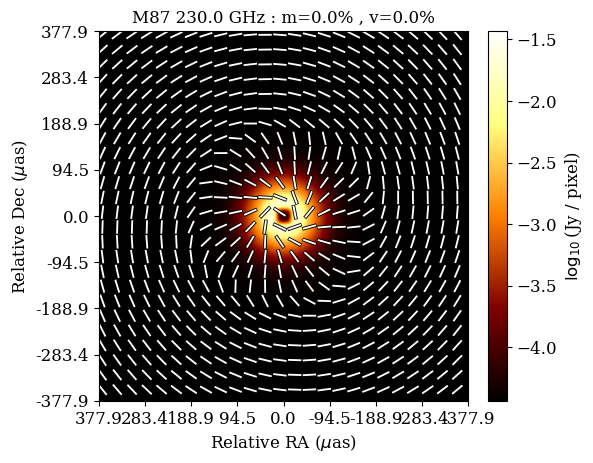

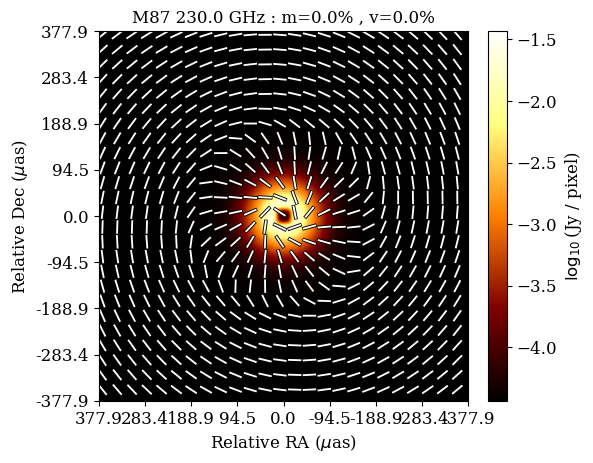

In [6]:
# combine into image
im_total5 = makeim(ivec_5_nogamma[-1], qvec_5_nogamma[-1], uvec_5_nogamma[-1], agrid5)
im_total5.display(plotp=True,pcut=0,scale='log')